In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("kyphosis.csv")

In [4]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

<AxesSubplot:>

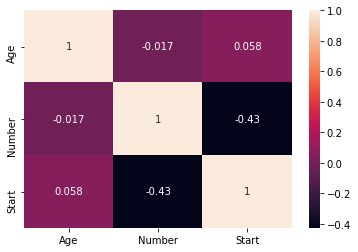

In [7]:
sns.heatmap(df.corr(), annot=True)

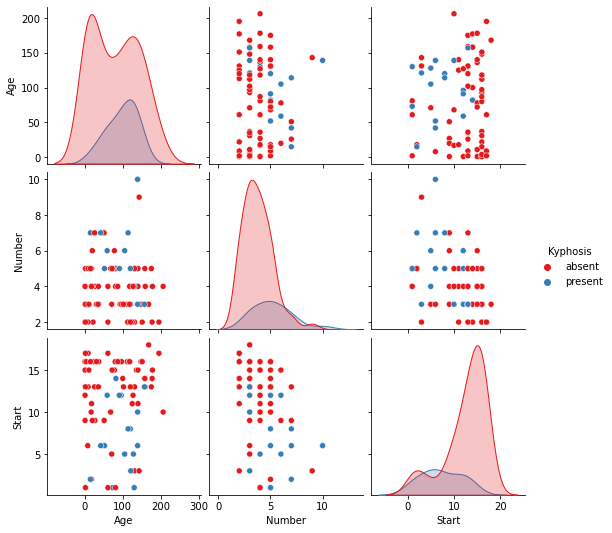

In [8]:
sns.pairplot(df, hue="Kyphosis", palette="Set1")

In [9]:
X = df.drop("Kyphosis", axis=1)
y = df["Kyphosis"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = dtree.predict(X_test)

In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [17]:
cnf_matrix

array([[16,  3],
       [ 4,  2]])

Text(0.5, 15.0, 'Predicted label')

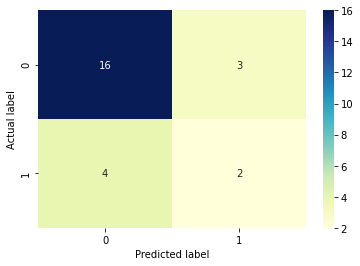

In [21]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



In [24]:
features = list(df.columns[1:])
targets = ["absent", "present"]
print(features, "\n", targets)

['Age', 'Number', 'Start'] 
 ['absent', 'present']


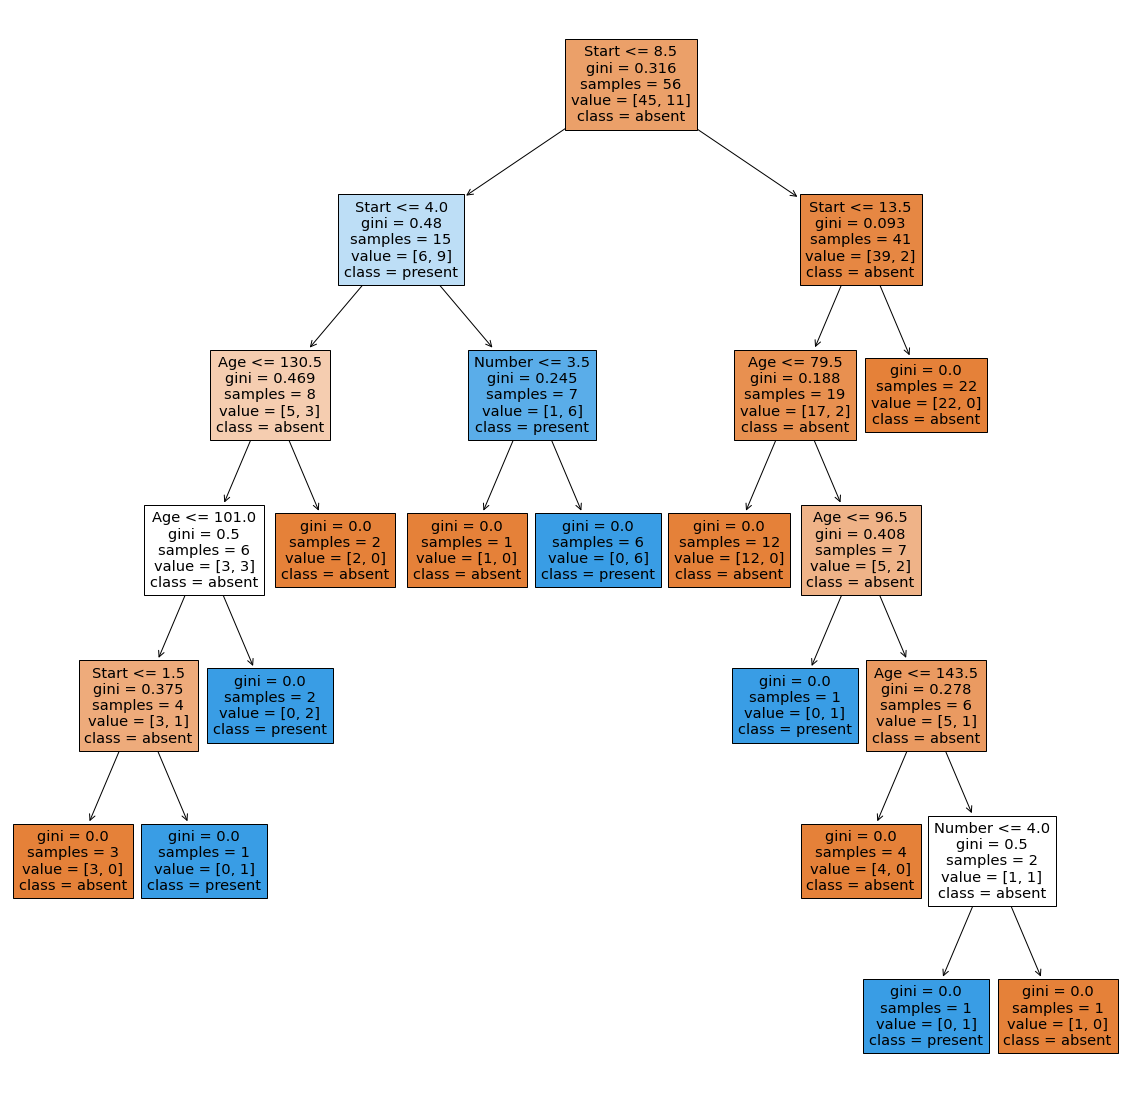

In [25]:
plt.figure(figsize=(20, 20))
tree2 = tree.plot_tree(dtree, filled=True, feature_names=features, class_names=targets)

In [27]:
model = RandomForestClassifier(n_estimators=100)

In [28]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = model.predict(X_test)

In [30]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [31]:
cnf_matrix

array([[19,  0],
       [ 5,  1]])

Text(0.5, 15.0, 'Predicted label')

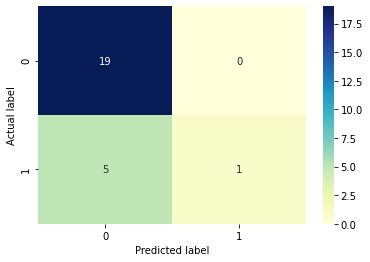

In [32]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [37]:
fn = features
cn = targets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=800)
tree.plot_tree(model.estimators_[0],
              feature_names=fn,
              class_names=cn,
              filled=True)
plt.show()